#### Import libraries 

In [177]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data 

In [178]:
flight_data = pd.read_csv("flight_data.csv")

#### Explore the data

In [179]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [180]:
flight_data.shape

(336776, 19)

##### Dictionary 
- dep_time >> the departure time in 0000 = 00:00   
- sched_dep_time >> the schedule the departure time for flight not the actual departure tieme in 0000 = 00:00  
- dep_delay  >> the duration of delay in mins 
- arr_time  >> the arrival time in 0000 = 00:00 
- sched_arr_time  >> the schedule the expected arrival time for flight not the actual arrival tieme in 0000 = 00:00
- arr_delay  >> the duration of delay in mins 
- carrier  >> airlines company there are diffrent carriers in dataset 
- flight  >> flight number 
- tailnum >> tail number is airplane number for the flight 
- origin >> departure airport of the flights 
- dest >> destinations 
- air_time >> the duration of the flight in mins 
- distance >> the distance from origin to destination in miles
- hour >> hour of schedule departure time 
- minute >> mins of schedule departure time
- time_hour >> date of the flight and the deprture hour only

- create new column for date 

In [181]:
list1 = flight_data.loc[:,"year":'day']
flight_data['date'] = pd.to_datetime(list1)

In [182]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year            336776 non-null  int64         
 1   month           336776 non-null  int64         
 2   day             336776 non-null  int64         
 3   dep_time        328521 non-null  float64       
 4   sched_dep_time  336776 non-null  int64         
 5   dep_delay       328521 non-null  float64       
 6   arr_time        328063 non-null  float64       
 7   sched_arr_time  336776 non-null  int64         
 8   arr_delay       327346 non-null  float64       
 9   carrier         336776 non-null  object        
 10  flight          336776 non-null  int64         
 11  tailnum         334264 non-null  object        
 12  origin          336776 non-null  object        
 13  dest            336776 non-null  object        
 14  air_time        327346 non-null  flo

- lookup for duplicate 

In [183]:
# No duplicated values 
flight_data.duplicated().sum()

0

#### Handling missing value 

- lookup for null values 

In [184]:
flight_data.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
date                 0
dtype: int64

In [185]:
check_null = flight_data[flight_data['dep_time'].isnull()]
check_null
 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,1/1/2013 16:00,2013-01-01
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,1/1/2013 19:00,2013-01-01
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,1/1/2013 15:00,2013-01-01
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,1/1/2013 6:00,2013-01-01
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,2/1/2013 15:00,2013-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00,2013-09-30
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00,2013-09-30
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00,2013-09-30
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,2013-09-30


In [186]:
#delete this subset >> 8255
flight_data.dropna(subset=['dep_time'], inplace=True)
flight_data.shape

(328521, 20)

In [187]:
flight_data.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time           458
sched_arr_time       0
arr_delay         1175
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          1175
distance             0
hour                 0
minute               0
time_hour            0
date                 0
dtype: int64

In [188]:
# we assume that is no arr_time, arr_delay for flights the flight may be was schedualed but get 
# canceled even after delay 
check_null3 = flight_data[flight_data['arr_time'].isnull()]
check_null3

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
754,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,N14168,EWR,OKC,NaN,1325,19,30,1/1/2013 19:00,2013-01-01
1714,2013,1,2,2041.0,2045,-4.0,NaN,2359,NaN,B6,147,N630JB,JFK,RSW,NaN,1074,20,45,2/1/2013 20:00,2013-01-02
1756,2013,1,2,2145.0,2129,16.0,NaN,33,NaN,UA,1299,N12221,EWR,RSW,NaN,1068,21,29,2/1/2013 21:00,2013-01-02
7039,2013,1,9,615.0,615,0.0,NaN,855,NaN,9E,3856,N161PQ,JFK,ATL,NaN,760,6,15,9/1/2013 6:00,2013-01-09
7851,2013,1,9,2042.0,2040,2.0,NaN,2357,NaN,B6,677,N807JB,JFK,LAX,NaN,2475,20,40,9/1/2013 20:00,2013-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328710,2013,9,22,1244.0,1215,29.0,NaN,1405,NaN,MQ,3616,N501MQ,LGA,MSP,NaN,1020,12,15,22-09-2013 12:00,2013-09-22
330305,2013,9,24,623.0,625,-2.0,NaN,800,NaN,MQ,3525,N735MQ,LGA,RDU,NaN,431,6,25,24-09-2013 06:00,2013-09-24
330418,2013,9,24,800.0,800,0.0,NaN,933,NaN,UA,544,N827UA,LGA,ORD,NaN,733,8,0,24-09-2013 08:00,2013-09-24
334177,2013,9,27,2253.0,1945,188.0,NaN,2146,NaN,EV,5306,N605QX,LGA,GSO,NaN,461,19,45,27-09-2013 19:00,2013-09-27


In [189]:
# delete 458 row from this subset 
flight_data.dropna(subset=['arr_time'], inplace=True)


In [190]:
flight_data.isnull().sum()

year                0
month               0
day                 0
dep_time            0
sched_dep_time      0
dep_delay           0
arr_time            0
sched_arr_time      0
arr_delay         717
carrier             0
flight              0
tailnum             0
origin              0
dest                0
air_time          717
distance            0
hour                0
minute              0
time_hour           0
date                0
dtype: int64

In [191]:
# we can count this if we have time >> due to the lack of time 
check_null2 = flight_data[flight_data['arr_delay'].isnull()]
check_null2

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,1/1/2013 15:00,2013-01-01
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,1/1/2013 14:00,2013-01-01
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,1/1/2013 17:00,2013-01-01
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,1/1/2013 17:00,2013-01-01
725,2013,1,1,1939.0,1840,59.0,29.0,2151,NaN,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,1/1/2013 18:00,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334197,2013,9,28,555.0,600,-5.0,953.0,753,NaN,EV,5068,N133EV,EWR,DTW,NaN,488,6,0,28-09-2013 06:00,2013-09-28
334354,2013,9,28,847.0,839,8.0,1130.0,959,NaN,EV,4510,N14542,EWR,MKE,NaN,725,8,39,28-09-2013 08:00,2013-09-28
334412,2013,9,28,1010.0,1020,-10.0,1344.0,1222,NaN,EV,4412,N12175,EWR,DSM,NaN,1017,10,20,28-09-2013 10:00,2013-09-28
334495,2013,9,28,1214.0,1225,-11.0,1801.0,1510,NaN,AA,300,N488AA,EWR,DFW,NaN,1372,12,25,28-09-2013 12:00,2013-09-28


In [192]:
flight_data.dropna(subset=['arr_delay'], inplace=True)

In [193]:
flight_data.dropna(subset=['air_time'], inplace=True)

In [194]:
flight_data.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
date              0
dtype: int64

In [195]:
#flight_data['cal_time']= flight_data['arr_time'] - flight_data['sched_arr_time']

In [196]:
flight_data.shape

(327346, 20)

In [197]:
sub = flight_data.loc[:,'dep_time':]
sub.describe()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314,13.141010,26.234116
std,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523,4.662063,19.295918
min,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000,5.000000,0.000000
25%,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000,9.000000,8.000000
50%,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000,13.000000,29.000000
75%,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000,17.000000,44.000000
max,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


- Add now column to evaluate delayed flights 

In [198]:
# we created a function to determine if the delay was resonable based on departure delay average == 13 
def determine(x):
    if x>13:
        x=True
    else:
        x=False
    return x

In [199]:
# we created a now column 
flight_data['delay_evaluation'] = flight_data['dep_delay'].apply(determine)

In [200]:
flight_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,date,delay_evaluation
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,2013-01-01,False
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,2013-01-01,False
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,2013-01-01,False
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,2013-01-01,False
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,2013-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,...,N354JB,JFK,SYR,41.0,209,22,45,30-09-2013 22:00,2013-09-30,False
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,...,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00,2013-09-30,False
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,...,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00,2013-09-30,False
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00,2013-09-30,False


1- How many tail number we have in the dataset ? 


In [201]:
flight_data['tailnum'].nunique()

4037

In [202]:
flight_data['tailnum'].value_counts() 

N725MQ    544
N722MQ    485
N723MQ    475
N711MQ    462
N713MQ    449
         ... 
N456UW      1
N26906      1
N809NW      1
N941UW      1
N557AS      1
Name: tailnum, Length: 4037, dtype: int64

In [203]:
# count the delyed flight for each tailnum and show total flight 
flight_data.groupby(['tailnum']).agg({'delay_evaluation':'sum', 'tailnum':'count'}).sort_values(by='delay_evaluation', ascending=False) 

,delay_evaluation,tailnum
tailnum,,
N15910,118,265
N258JB,117,420
N725MQ,116,544
N228JB,114,380
N12921,106,265
...,...,...
N675MC,0,5
N68159,0,5
N302AS,0,1


In [204]:
# we assign the subset to a dataframe 
tailnum_data = flight_data.groupby(['tailnum']).agg({'delay_evaluation':'sum', 'tailnum':'count'}).sort_values(by='delay_evaluation', ascending=False) 

In [205]:
# we added now column to calculate the probability of delay for each tailnum 
tailnum_data['delay_probability'] = (tailnum_data['delay_evaluation'] / tailnum_data['tailnum'])*100  
tailnum_data

,delay_evaluation,tailnum,delay_probability
tailnum,,,
N15910,118,265,44.528302
N258JB,117,420,27.857143
N725MQ,116,544,21.323529
N228JB,114,380,30.000000
N12921,106,265,40.000000
...,...,...,...
N675MC,0,5,0.000000
N68159,0,5,0.000000
N302AS,0,1,0.000000


2- How many flights per carrier are there?  


In [206]:
flight_data['carrier'].value_counts()

UA    57782
B6    54049
EV    51108
DL    47658
AA    31947
MQ    25037
US    19831
9E    17294
WN    12044
VX     5116
FL     3175
AS      709
F9      681
YV      544
HA      342
OO       29
Name: carrier, dtype: int64

3- How many carrier we have in the dataset? 


In [207]:
flight_data['carrier'].nunique()

16

4- How many origin in the dataset?  

In [208]:
flight_data['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

- Explore destination and distance  columns

5- How many destinations are there in the dataset? 

In [209]:
flight_data['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TYS', 'PVD', 'DSM', 'PSE', 'TUL', 'BHM', 'OKC', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC'], dtype=object)

6- How many flight to each destination per month? 

In [210]:
# we suggested that some destination have higher attention in some season  
flight_data.groupby(['dest','month']).month.count()

dest  month
ABQ   4         9
      5        31
      6        30
      7        31
      8        31
               ..
XNA   8        87
      9        80
      10       91
      11       72
      12       62
Name: month, Length: 1112, dtype: int64

7- What is the longest distance from each origin to other destination?

In [211]:
flight_data.distance.max()

4983

In [212]:
flight_data.groupby(['origin','dest']).agg({'distance':'max'}).sort_values(by='distance', ascending=False) 


distance
origin dest          
JFK    HNL       4983
EWR    HNL       4963
       ANC       3370
JFK    SFO       2586
       OAK       2576
...               ...
EWR    ALB        143
       BDL        116
LGA    PHL         96
JFK    PHL         94
EWR    PHL         80

[223 rows x 1 columns]

- Explore arrival and departure delay columns

8- Sort the carriers based on their maximum departure delay?

In [213]:
flight_data.groupby(['carrier']).agg({'dep_delay':'max'}).sort_values(by='dep_delay', ascending=False)
# HA 

,dep_delay
carrier,
HA,1301.0
MQ,1137.0
AA,1014.0
DL,960.0
F9,853.0
9E,747.0
VX,653.0
FL,602.0
EV,548.0


9- Which months have the most arrival delay? 


In [214]:
flight_data.groupby(['month']).agg({'arr_delay':'mean'}).sort_values(by='arr_delay', ascending=False)
# 7,6,12 >> holiday months 

,arr_delay
month,
7,16.711307
6,16.481330
12,14.870355
4,11.176063
1,6.129972
8,6.040652
3,5.807577
2,5.613019
5,3.521509


11- Which months have the most depature delay? 

In [215]:
# mean departed delay according to each month 
flight_data.groupby(['month']).agg({'dep_delay':'mean'}).sort_values(by='dep_delay', ascending=False)


,dep_delay
month,
7,21.522179
6,20.725614
12,16.482161
4,13.849187
3,13.164289
5,12.891709
8,12.570524
2,10.760239
1,9.985491


12- How many flights depart and arrive on schedule? 

In [216]:
flight_data['no_delay'] = (flight_data.dep_delay == 0) & (flight_data.arr_delay == 0)
flight_data.groupby(['origin']).agg({'no_delay':'sum'}).sort_values(by='no_delay', ascending=False)

,no_delay
origin,
JFK,131
EWR,117
LGA,99


### Data Visulasation 

1- display departure delay for each origin per month 

In [217]:
sns.set(font_scale=1.5)
plt.style.use('ggplot')

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 8, 4
sns.set(rc = {'figure.figsize':(15,8)})

In [218]:
sns.set_theme(style="white")

/home/rawan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


This plot display the monthly delayed flights at each airport


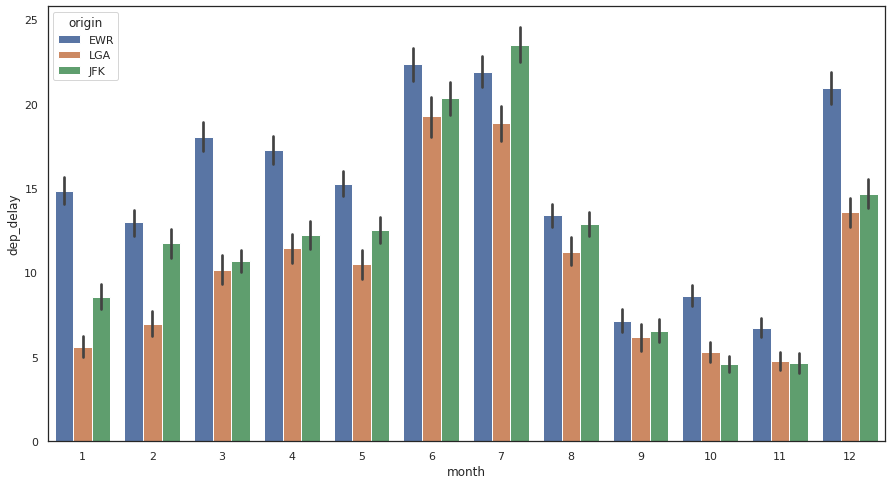

In [219]:
sns.barplot('month','dep_delay','origin', data=flight_data)
print("This plot display the monthly delayed flights at each airport")

2- Display delay probability for each tail number (airplane)

In [220]:
sns.scatterplot(y='delay_probability' , x=tailnum_data.index ,data =tailnum_data);

3- Display number of flights for each carrier in 2013 

<AxesSubplot:xlabel='carrier', ylabel='Count'>

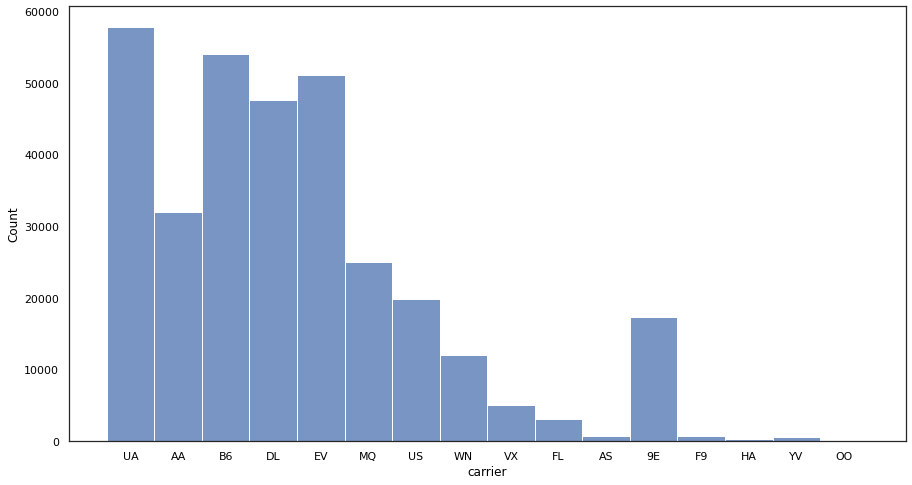

In [ ]:
sns.histplot(flight_data['carrier'])

#### conclusion 
- There were two factors that affect the flight schedule: 
   - seasons -  time of year could affect the flights, where there was a riase in delayed flights
   - tail number - diffrent airplane have different chances to be delayed.

- Outcomes:
   - Airlines carries need to prepare more on holiday seasons such as summer (6 june ,7 july) 
   - Airlines carries evaluate airplanes, because some airplanes need more maintaince to optimize the performance.   
